# Defining the molecule space

In [6]:
import rdkit
from rdkit import Chem
from rdkit.Chem import Draw
from IPython.display import display


In [7]:

smiles_to_name = {
    'C': 'Methane',
    'CC': 'Ethane',
    'CCC': 'Propane',
    'CCCC': 'Butane',
    'CC(C)C': 'Isobutane',  # 2-methylpropane
    'CCCCC': 'Pentane',
    'CC(C)CC': 'Isopentane',  # 2-methylbutane
    'CC(C)(C)C': 'Neopentane',  # 2,2-dimethylpropane
    'CCCCCC': 'Hexane',
    'CC(C)CCC': '2-Methylpentane',
    'CC(C)C(C)C': '2,3-Dimethylbutane',
    'CCCCCCC': 'Heptane',
    
    # Alkenes

    
    
    # Alkines

    # Alcohols (-OH)
    'CO': 'Methanol',
    'CCO': 'Ethanol',
    'CCCO': '1-Propanol',
    'CC(O)C': '2-Propanol',  # Isopropanol (renamed for consistency)
    'CCCCO': '1-Butanol',
    'CC(O)CC': '2-Butanol',
    'CC(C)CO': 'Isobutanol',  # 2-methyl-1-propanol
    'CC(C)(C)O': 'tert-Butanol',
    'CCCCCO': '1-Pentanol',
    'CCCC(O)C': '2-Pentanol',
    'CCCCCCO': '1-Hexanol',
    'CCCCCCCO': '1-Heptanol',
    
    # Aldehydes (-CHO)
    'C=O': 'Formaldehyde',
    'CC=O': 'Acetaldehyde',
    'CCC=O': 'Propanal',
    'CCCC=O': 'Butanal',
    'CCCCC=O': 'Pentanal',
    'CCCCCC=O': 'Hexanal',
    'CCCCCCC=O': 'Heptanal',
    
    # Ketones (R-C(=O)-R')
    'CC(C)=O': 'Acetone',
    'CCC(=O)C': '2-Butanone',
    'CCCC(C)=O': '2-Pentanone',
    'CCC(=O)CC': '3-Pentanone',

    # Carboxylic Acids (-COOH)
    'C(=O)O': 'Formic acid',
    'CC(=O)O': 'Acetic acid',
    'CCC(=O)O': 'Propionic acid',
    'CCCC(=O)O': 'Butyric acid',
    'CCCCC(=O)O': 'Valeric acid',
    'CCCCCC(=O)O': 'Hexanoic acid',
    'CCCCCCC(=O)O': 'Heptanoic acid',

    # Ethers (R-O-R')
    'COC': 'Dimethyl ether',
    'COCC': 'Ethyl methyl ether',
    'CCOCC': 'Diethyl ether',

    # Esters (R-C(=O)O-R')
    'COC=O': 'Methyl formate',
    'CCOC=O': 'Ethyl formate',
    'CC(=O)OC': 'Methyl acetate',
    'CC(=O)OCC': 'Ethyl acetate',
    'CCC(=O)OC': 'Methyl propanoate',

    # Halogenated Hydrocarbons
    'CCl': 'Chloromethane',
    'C(Cl)Cl': 'Dichloromethane',
    'C(Cl)(Cl)Cl': 'Chloroform',
    'C(Cl)(Cl)(Cl)Cl': 'Carbon tetrachloride',
    'CCCl': 'Chloroethane',
    'CCCCl': '1-Chloropropane',
    'CC(Cl)C': '2-Chloropropane',
}

molecule_smiles = [s for s in smiles_to_name.keys()]

In [8]:
smiles_to_name = {
    'alkanes': {
    'C': 'Methane',
    'CC': 'Ethane',
    'CCC': 'Propane',
    'CCCC': 'Butane',
    'CC(C)C': 'Isobutane',  # 2-methylpropane
    'CCCCC': 'Pentane',
    'CC(C)CC': 'Isopentane',  # 2-methylbutane
    'CC(C)(C)C': 'Neopentane',  # 2,2-dimethylpropane
    'CCCCCC': 'Hexane',
    'CC(C)CCC': '2-Methylpentane',
    'CC(C)C(C)C': '2,3-Dimethylbutane',
    'CCCCCCC': 'Heptane'},
    
    'alcohols': {
    # Alcohols (-OH)
    'CO': 'Methanol',
    'CCO': 'Ethanol',
    'CCCO': '1-Propanol',
    'CC(O)C': '2-Propanol',  # Isopropanol (renamed for consistency)
    'CCCCO': '1-Butanol',
    'CC(O)CC': '2-Butanol',
    'CC(C)CO': 'Isobutanol',  # 2-methyl-1-propanol
    'CC(C)(C)O': 'tert-Butanol',
    'CCCCCO': '1-Pentanol',
    'CCCC(O)C': '2-Pentanol',
    'CCCCCCO': '1-Hexanol',
    'CCCCCCCO': '1-Heptanol'},

    
    'aldehydes':{
    # Aldehydes (-CHO)
    'C=O': 'Formaldehyde',
    'CC=O': 'Acetaldehyde',
    'CCC=O': 'Propanal',
    'CCCC=O': 'Butanal',
    'CCCCC=O': 'Pentanal',
    'CCCCCC=O': 'Hexanal',
    'CCCCCCC=O': 'Heptanal'},
    
    'ketones': {
    # Ketones (R-C(=O)-R')
    'CC(C)=O': 'Acetone',
    'CCC(=O)C': '2-Butanone',
    'CCCC(C)=O': '2-Pentanone',
    'CCC(=O)CC': '3-Pentanone'},

    'carboxylic acids': {
    # Carboxylic Acids (-COOH)
    'C(=O)O': 'Formic acid',
    'CC(=O)O': 'Acetic acid',
    'CCC(=O)O': 'Propionic acid',
    'CCCC(=O)O': 'Butyric acid',
    'CCCCC(=O)O': 'Valeric acid',
    'CCCCCC(=O)O': 'Hexanoic acid',
    'CCCCCCC(=O)O': 'Heptanoic acid'},
    
    'ethers': {
    # Ethers (R-O-R')
    'COC': 'Dimethyl ether',
    'COCC': 'Ethyl methyl ether',
    'CCOCC': 'Diethyl ether'},

    'esters': {
    # Esters (R-C(=O)O-R')
    'COC=O': 'Methyl formate',
    'CCOC=O': 'Ethyl formate',
    'CC(=O)OC': 'Methyl acetate',
    'CC(=O)OCC': 'Ethyl acetate',
    'CCC(=O)OC': 'Methyl propanoate'},

    'halogenated_hydrocarbons': {
    # Halogenated Hydrocarbons
    'CCl': 'Chloromethane',
    'C(Cl)Cl': 'Dichloromethane',
    'C(Cl)(Cl)Cl': 'Chloroform',
    'C(Cl)(Cl)(Cl)Cl': 'Carbon tetrachloride',
    'CCCl': 'Chloroethane',
    'CCCCl': '1-Chloropropane',
    'CC(Cl)C': '2-Chloropropane'}
}

In [ ]:
smiles_to_name_new_12 = {
    'alkanes': {
    'C': 'Methane',
    'CC': 'Ethane',
    'CCC': 'Propane',
    'CCCC': 'Butane',
    'CC(C)C': 'Isobutane',  # 2-methylpropane
    'CCCCC': 'Pentane',
    'CC(C)CC': 'Isopentane',  # 2-methylbutane
    'CC(C)(C)C': 'Neopentane',  # 2,2-dimethylpropane
    'CCCCCC': 'Hexane',
    'CC(C)CCC': '2-Methylpentane',
    'CC(C)C(C)C': '2,3-Dimethylbutane',
    'CCCCCCC': 'Heptane'},
    
    # Alkenes

    
    
    # Alkines
    'alcohols': {
    # Alcohols (-OH)
    'CO': 'Methanol',
    'CCO': 'Ethanol',
    'CCCO': '1-Propanol',
    'CC(O)C': '2-Propanol',  # Isopropanol (renamed for consistency)
    'CCCCO': '1-Butanol',
    'CC(O)CC': '2-Butanol',
    'CC(C)CO': 'Isobutanol',  # 2-methyl-1-propanol
    'CC(C)(C)O': 'tert-Butanol',
    'CCCCCO': '1-Pentanol',
    'CCCC(O)C': '2-Pentanol',
    'CCCCCCO': '1-Hexanol',
    'CCCCCCCO': '1-Heptanol'},

    
    'aldehydes':{
    # Aldehydes (-CHO)
    'C=O': 'Formaldehyde',
    'CC=O': 'Acetaldehyde',
    'CCC=O': 'Propanal',
    'CCCC=O': 'Butanal',
    'CCCCC=O': 'Pentanal',
    'CCCCCC=O': 'Hexanal',
    'CCCCCCC=O': 'Heptanal',
    'CC(C)=O': 'Isobutyraldehyde',
    'CC(C)CC=O': 'Isovaleraldehyde',
    'CC(C)(C)C=O': 'Pivaldehyde',
    'CC(C)C=O': '2-Methylpropanal',
    'CC(C)C(C)C=O': '2,3-Dimethylbutanal'},
    
    'ketones': {
    # Ketones (R-C(=O)-R')
    'CC(C)=O': 'Acetone',
    'CCC(=O)C': '2-Butanone',
    'CC(=O)CC': '3-Butanone',
    'CCCC(C)=O': '2-Pentanone',
    'CCC(=O)CC': '3-Pentanone',
    'CC(C)(C)C(=O)C': '3,3-Dimethyl-2-butanone',
    'CC(C)C(=O)C': '2-Methyl-2-butanone',
    'CCCCC(=O)C': '2-Hexanone',
    'CC(=O)CCCC': '3-Hexanone',
    'CC(C)CC(=O)C': '2-Methyl-3-pentanone',
    'CC(C)C(=O)CC': '3-Methyl-2-pentanone',
    'CC(C)(C)C(=O)CC': '3,3-Dimethyl-3-butanone'},

    'carboxylic acids': {
    # Carboxylic Acids (-COOH)
    'C(=O)O': 'Formic acid',
    'CC(=O)O': 'Acetic acid',
    'CCC(=O)O': 'Propionic acid',
    'CCCC(=O)O': 'Butyric acid',
    'CCCCC(=O)O': 'Valeric acid',
    'CCCCCC(=O)O': 'Hexanoic acid',
    'CCCCCCC(=O)O': 'Heptanoic acid',
    'CC(C)C(=O)O': 'Isobutyric acid',
    'CC(C)(C)C(=O)O': 'Pivalic acid',
    'CC(C)CC(=O)O': 'Isovaleric acid',
    'CC(C)CCC(=O)O': '2-Methylbutyric acid',
    'CC(C)C(C)C(=O)O': '2,3-Dimethylbutyric acid'},
    
    'ethers': {
    # Ethers (R-O-R')
    'COC': 'Dimethyl ether',
    'COCC': 'Ethyl methyl ether',
    'CCOCC': 'Diethyl ether',
    'CCCOC': 'Propyl methyl ether',
    'CCOCCC': 'Propyl ethyl ether',
    'CCCCOC': 'Butyl methyl ether',
    'CCCCOCC': 'Butyl ethyl ether',
    'CC(C)OC': 'Isopropyl methyl ether',
    'CC(C)OCC': 'Isopropyl ethyl ether',
    'CC(C)OCCC': 'Isopropyl propyl ether',
    'COCCOC': 'Methoxy ethoxy methane',
    'CC(C)(C)OC': 'tert-Butyl methyl ether'
    },

    'esters': {
    # Esters (R-C(=O)O-R')
    'COC=O': 'Methyl formate',
    'CCOC=O': 'Ethyl formate',
    'CC(=O)OC': 'Methyl acetate',
    'CC(=O)OCC': 'Ethyl acetate',
    'CCC(=O)OC': 'Methyl propanoate',
    'CCC(=O)OCC': 'Ethyl propanoate',
    'CC(=O)OCCC': 'Propyl acetate',
    'CC(C)(C)C(=O)OC': 'Methyl pivalate',
    'CC(C)C(=O)OC': 'Methyl isobutyrate',
    'CC(C)CC(=O)OC': 'Methyl isovalerate',
    'CC(C)CCC(=O)OC': 'Methyl 2-methylbutyrate',
    'CC(C)C(C)C(=O)OC': 'Methyl 2,3-dimethylbutyrate'},

    'halogenated_hydrocarbons': {
    # Halogenated Hydrocarbons
    'CCl': 'Chloromethane',
    'C(Cl)Cl': 'Dichloromethane',
    'C(Cl)(Cl)Cl': 'Chloroform',
    'C(Cl)(Cl)(Cl)Cl': 'Carbon tetrachloride',
    'CCCl': 'Chloroethane',
    'CCCCl': '1-Chloropropane',
    'CC(Cl)C': '2-Chloropropane',
    'CBr': 'Bromomethane',
    'C(Br)Br': 'Dibromomethane',
    'CCBr': 'Bromoethane',
    'CCF': 'Fluoroethane',
    'CC(F)Cl': 'Chlorofluoroethane'}
}

In [58]:
smiles_to_name_new_6 = {
    'alkanes': {
        'C': 'Methane',
        'CC': 'Ethane',
        'CCC': 'Propane',
        'CCCC': 'Butane',
        'CC(C)C': 'Isobutane',
        'CCCCC': 'Pentane'
    },
    'alcohols': {
        'CO': 'Methanol',
        'CCO': 'Ethanol',
        'CCCO': '1-Propanol',
        'CCCCO': '1-Butanol',
        'CC(O)C': '2-Propanol',
        'CCCCCO': '1-Pentanol'
    },
    'aldehydes': {
        'C=O': 'Formaldehyde',
        'CC=O': 'Acetaldehyde',
        'CCC=O': 'Propanal',
        'CCCC=O': 'Butanal',
        'CC(C)C=O': '2-Methylpropanal',
        'CCCCC=O': 'Pentanal',
    },
    'ketones': {
        'CC(C)=O': 'Acetone',
        'CCC(=O)C': '2-Butanone',
        'CCCC(C)=O': '2-Pentanone',
        'CCC(=O)CC': '3-Pentanone',
        'CC(C)CC(=O)C': '2-Methyl-3-pentanone',
        'CCCCC(=O)C': '2-Hexanone'
    },
    'carboxylic acids': {
        'C(=O)O': 'Formic acid',
        'CC(=O)O': 'Acetic acid',
        'CCC(=O)O': 'Propionic acid',
        'CCCC(=O)O': 'Butyric acid',
        'CC(C)C(=O)O': 'Isobutyric acid',
        'CCCCC(=O)O': 'Valeric acid',
    },
    'ethers': {
        'COC': 'Dimethyl ether',
        'COCC': 'Ethyl methyl ether',
        'CCOCC': 'Diethyl ether',
        'CCCOC': 'Propyl methyl ether',
        'CC(C)OC': 'Isopropyl methyl ether',
        'CCOCCC': 'Propyl ethyl ether',
    },
    'esters': {
        'COC=O': 'Methyl formate',
        'CCOC=O': 'Ethyl formate',
        'CC(=O)OC': 'Methyl acetate',
        'CC(=O)OCC': 'Ethyl acetate',
        'CCC(=O)OC': 'Methyl propanoate',
        'CC(C)C(=O)OC': 'Methyl isobutyrate'
    },
    'halogenated_hydrocarbons': {
        'CCl': 'Chloromethane',
        'C(Cl)Cl': 'Dichloromethane',
        'C(Cl)(Cl)Cl': 'Chloroform',
        'CCCl': 'Chloroethane',
        'CCCCl': '1-Chloropropane',
        'CC(Cl)C': '2-Chloropropane'
    },
    'amines': {
    'CN': 'Methylamine',
    'CCN': 'Ethylamine',
    'CCCN': 'Propylamine',
    'CCCCN': 'Butylamine',
    'CC(C)N': 'Isopropylamine',
    'CCCCCN':'1-Pentylamine'
}
    
}

Group:  alkanes  with len:  6


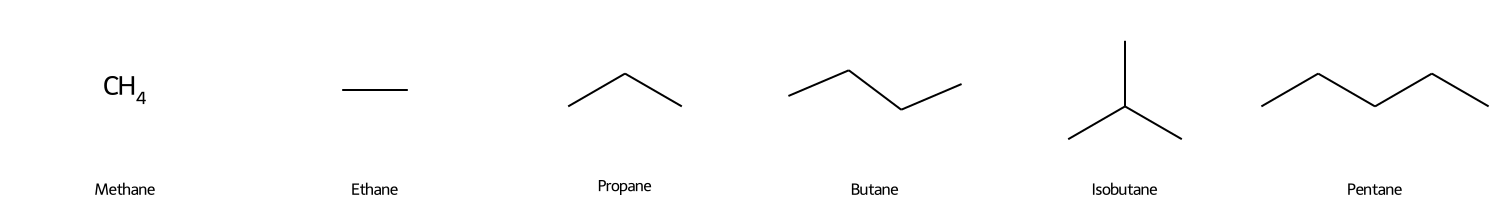

Group:  alcohols  with len:  6


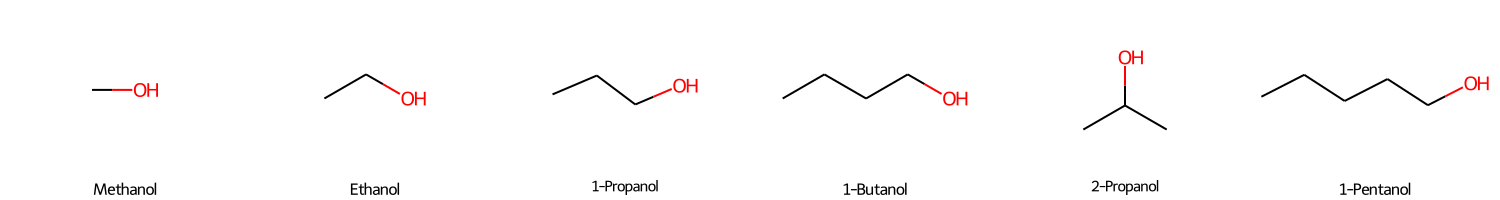

Group:  aldehydes  with len:  6


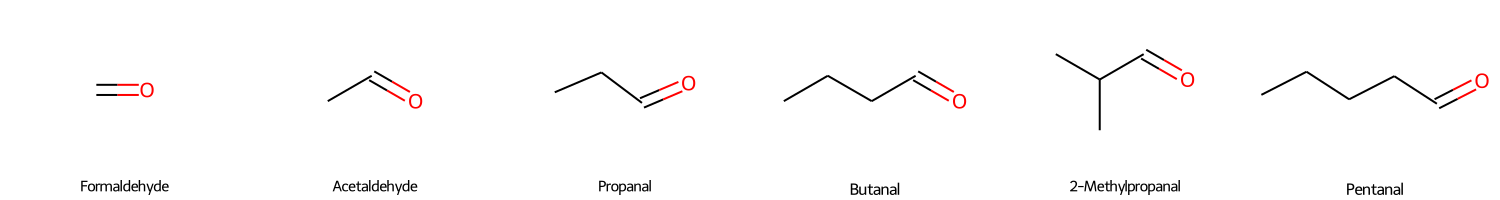

Group:  ketones  with len:  6


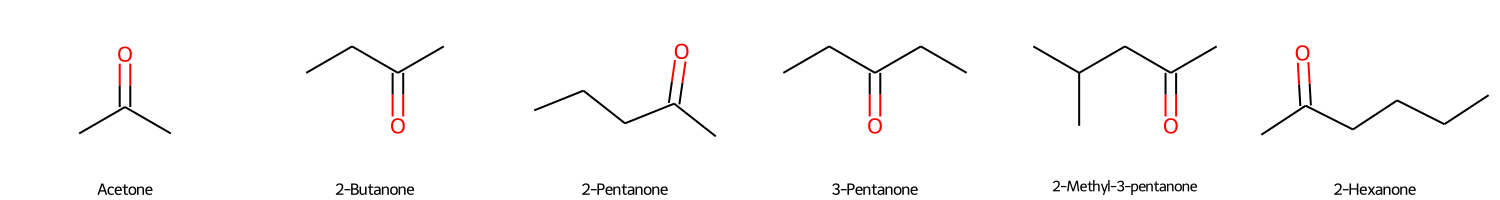

Group:  carboxylic acids  with len:  6


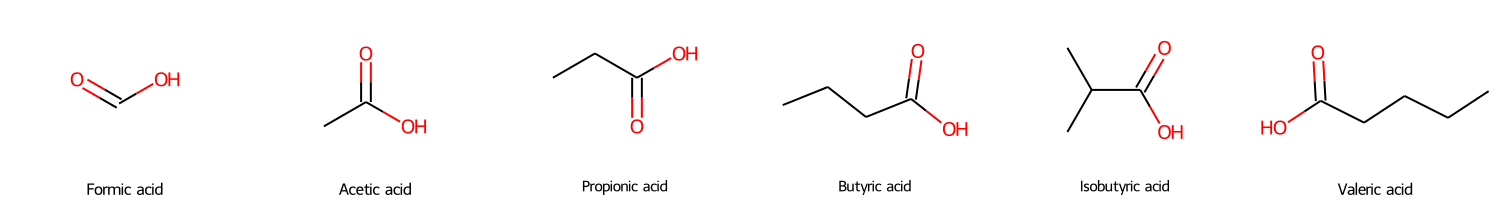

Group:  ethers  with len:  6


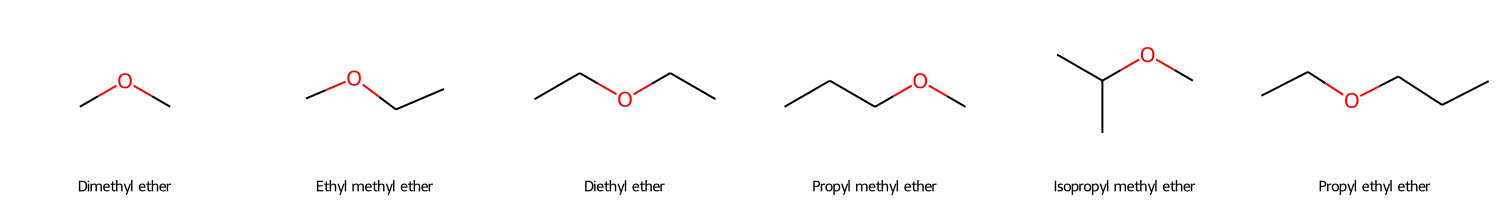

Group:  esters  with len:  6


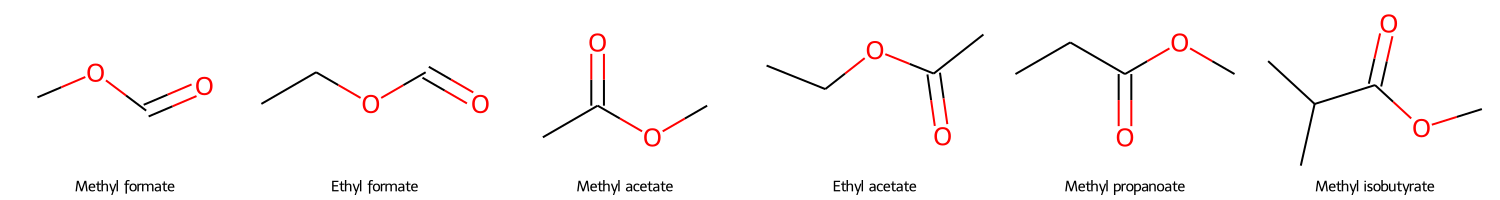

Group:  halogenated_hydrocarbons  with len:  6


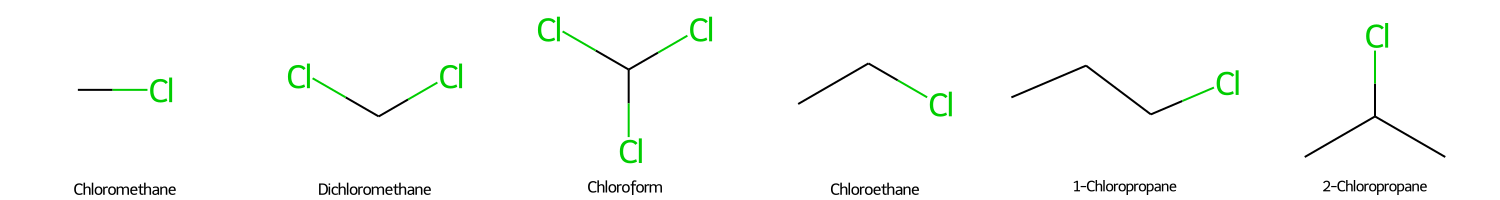

Group:  amines  with len:  6


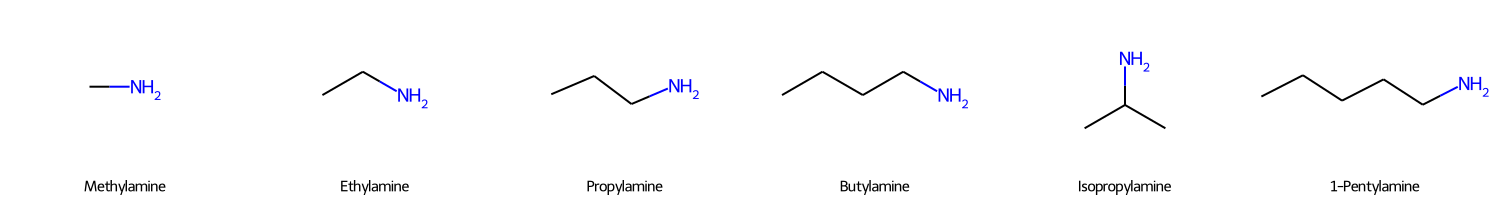

In [59]:
# Prepare list of (Mol, name) tuples

for k, v in smiles_to_name_new_6.items():
    mols = []
    names = []
    print("Group: ", k, " with len: ", len(v))
    for smi, name in v.items():
        mol = Chem.MolFromSmiles(smi)
        if mol is not None:
            mols.append(mol)
            names.append(name)
        else:
            print(f"Invalid SMILES: {smi} ({name})")

    # Draw molecules in a grid with names as legends
    img = Draw.MolsToGridImage(mols, legends=names, molsPerRow=6, subImgSize=(250, 200))

    display(img)
    # Checked all SMILES by hand, checked all naming and structures, all valid and correct
    # order and selection to be checked

Group:  alkanes  with len:  12


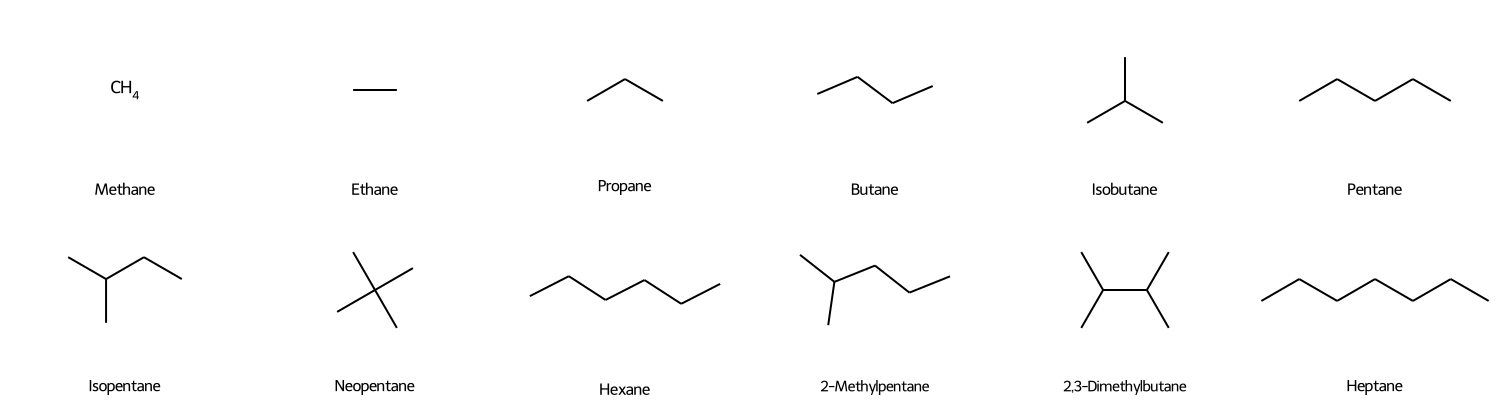

Group:  alcohols  with len:  12


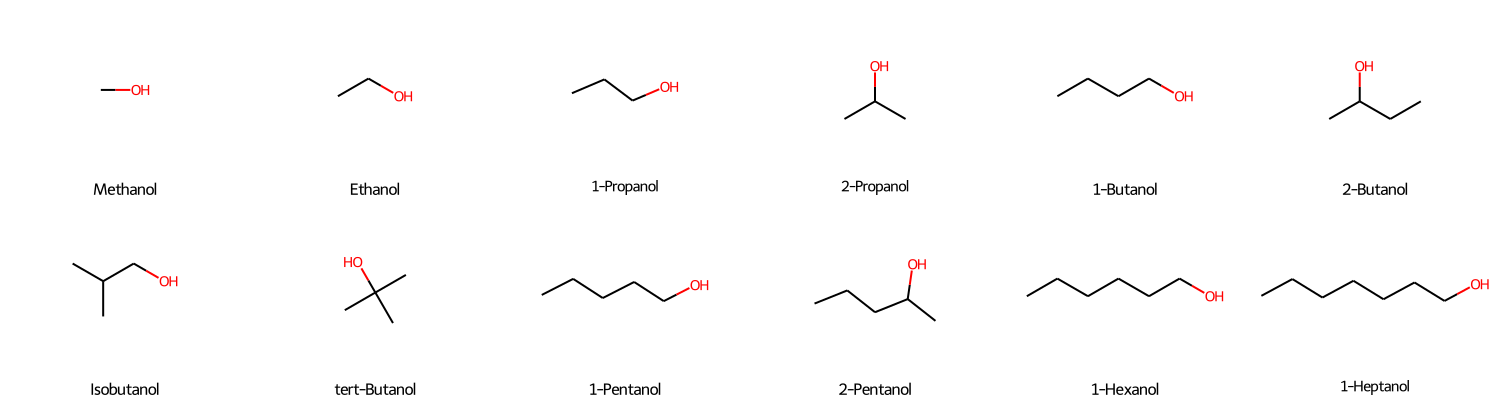

Group:  aldehydes  with len:  12


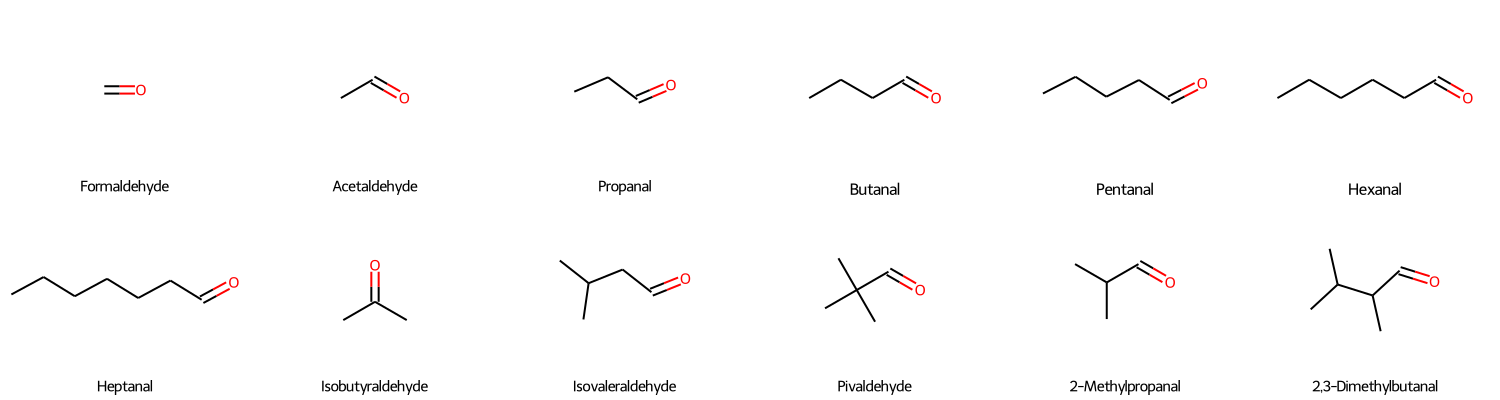

Group:  ketones  with len:  12


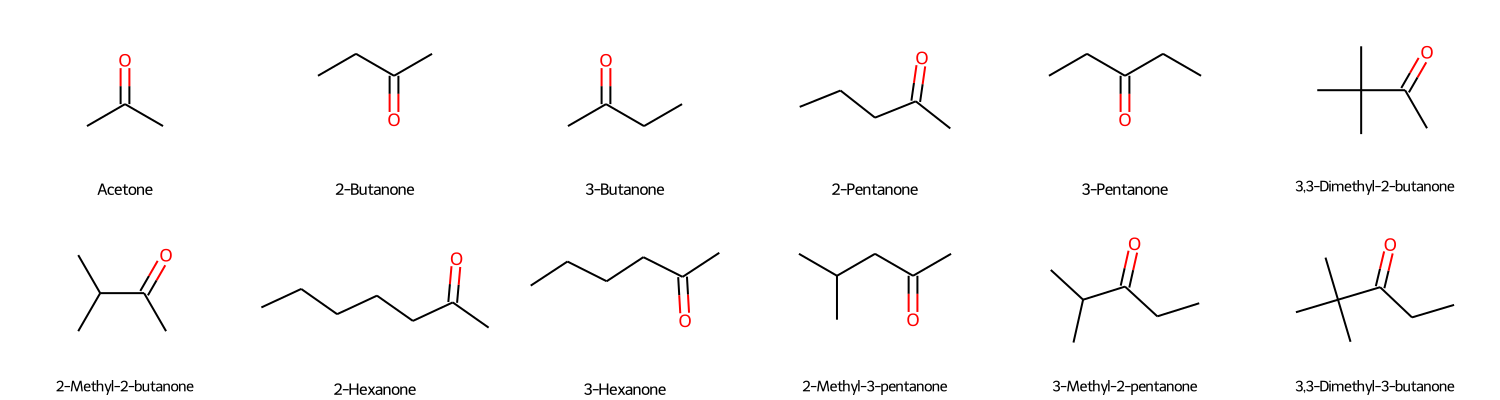

Group:  carboxylic acids  with len:  12


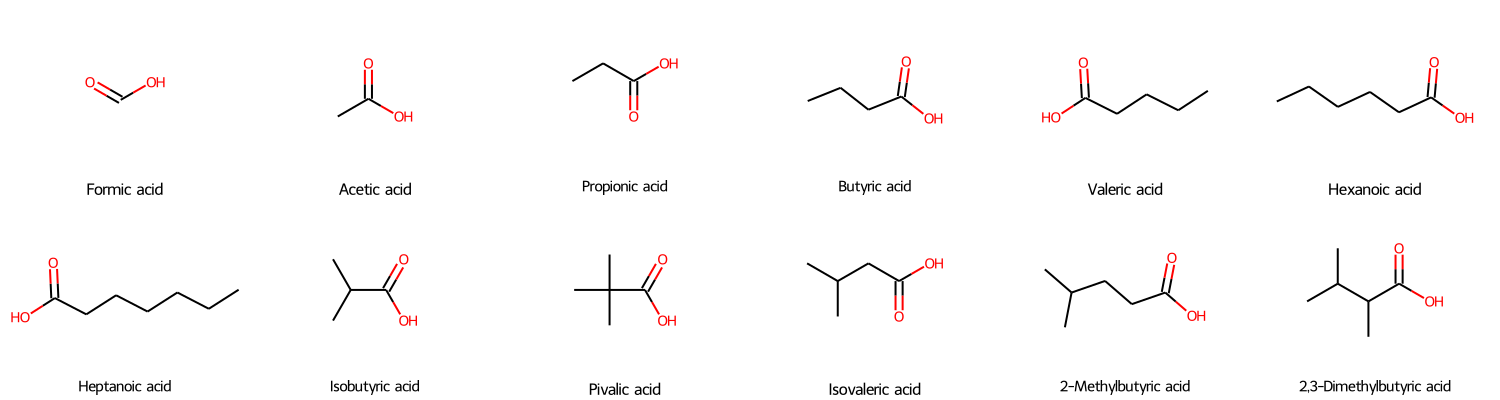

Group:  ethers  with len:  12


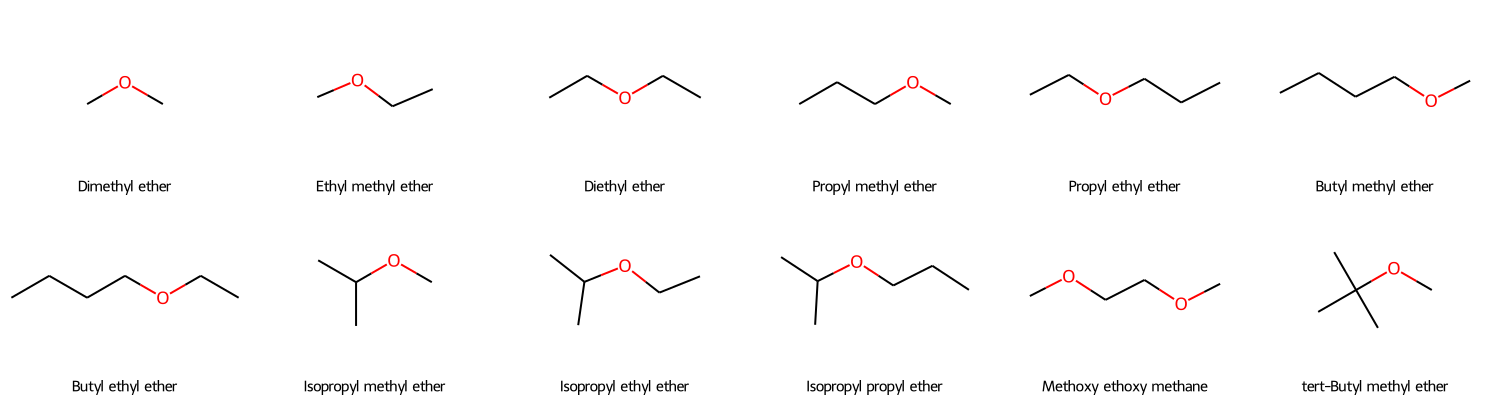

Group:  esters  with len:  12


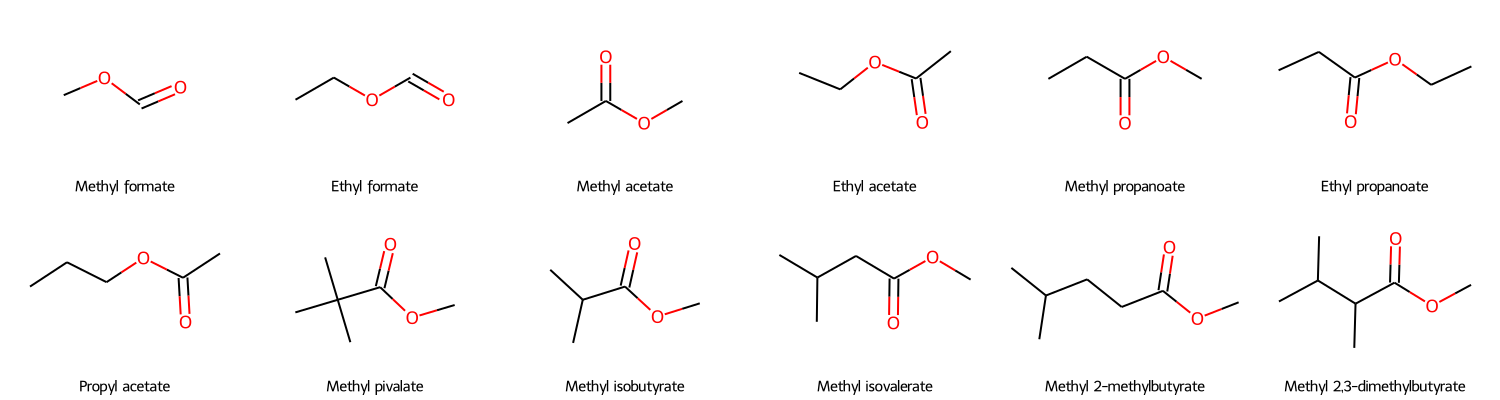

Group:  halogenated_hydrocarbons  with len:  12


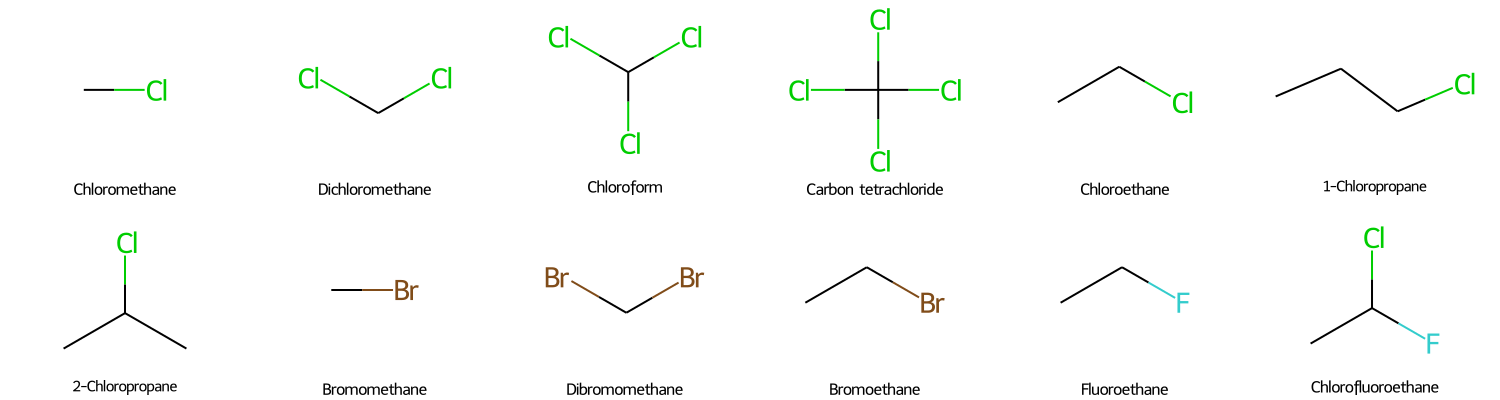

In [12]:
# Prepare list of (Mol, name) tuples

for k, v in smiles_to_name_new_12.items():
    mols = []
    names = []
    print("Group: ", k, " with len: ", len(v))
    for smi, name in v.items():
        mol = Chem.MolFromSmiles(smi)
        if mol is not None:
            mols.append(mol)
            names.append(name)
        else:
            print(f"Invalid SMILES: {smi} ({name})")

    # Draw molecules in a grid with names as legends
    img = Draw.MolsToGridImage(mols, legends=names, molsPerRow=6, subImgSize=(250, 200))

    display(img)